In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime as dt
from textblob import TextBlob
from nltk.corpus import stopwords

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv("caucasianjames_tweets.csv")

In [3]:
pd.set_option('display.max_columns', None)
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1242640549108219911,1242640549108219911,1585103568000,2020-03-24,22:32:48,EDT,272985460,caucasianjames,James,NaN,if i have an open casket funeral u can take se...,[],[],[],23,917,8558,[],[],https://twitter.com/CaucasianJames/status/1242...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '272985460', 'username': 'Caucasi...",NaN,NaN,NaN,NaN
1,1242635082113978368,1242632030334136321,1585102265000,2020-03-24,22:11:05,EDT,272985460,caucasianjames,James,NaN,working on it 🙄😒,['pammon_'],[],[],0,1,4,[],[],https://twitter.com/CaucasianJames/status/1242...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '272985460', 'username': 'Caucasi...",NaN,NaN,NaN,NaN
2,1242622804744421381,1242622804744421381,1585099338000,2020-03-24,21:22:18,EDT,272985460,caucasianjames,James,NaN,glad zoboomafoo isn’t alive to see all this,[],[],[],87,7609,34066,[],[],https://twitter.com/CaucasianJames/status/1242...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '272985460', 'username': 'Caucasi...",NaN,NaN,NaN,NaN
3,1242591295639519242,1242546715263205378,1585091825000,2020-03-24,19:17:05,EDT,272985460,caucasianjames,James,NaN,facetime me,['youngfishgod'],[],[],1,1,98,[],[],https://twitter.com/CaucasianJames/status/1242...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '272985460', 'username': 'Caucasi...",NaN,NaN,NaN,NaN
4,1242553830031740928,1242546715263205378,1585082893000,2020-03-24,16:48:13,EDT,272985460,caucasianjames,James,NaN,lol,['themopepope'],[],[],1,0,87,[],[],https://twitter.com/CaucasianJames/status/1242...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '272985460', 'username': 'Caucasi...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12989,52924510390845440,52921200032231424,1301453161000,2011-03-29,22:46:01,EDT,272985460,caucasianjames,James,NaN,@samkrabbenhoft it was on my iPod cause I thin...,['samkrabbenhoft'],[],[],0,0,0,[],[],https://twitter.com/CaucasianJames/status/5292...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '272985460', 'username': 'Caucasi...",NaN,NaN,NaN,NaN
12990,52920919366176768,52920919366176768,1301452305000,2011-03-29,22:31:45,EDT,272985460,caucasianjames,James,NaN,Perfect twit pic for @KillaQwaybin http://yf...,[],['http://yfrog.com/h8n2hnkj'],[],0,1,1,[],[],https://twitter.com/CaucasianJames/status/5292...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '272985460', 'username': 'Caucasi...",NaN,NaN,NaN,NaN
12991,52789706978635776,52789706978635776,1301421021000,2011-03-29,13:50:21,EDT,272985460,caucasianjames,James,NaN,Chuckin down krispy creams in study hall,[],[],[],0,0,3,[],[],https://twitter.com/CaucasianJames/status/5278...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '272985460', 'username': 'Caucasi...",NaN,NaN,NaN,NaN
12992,52210714185699329,52210714185699329,1301282978000,2011-03-27,23:29:38,EDT,272985460,caucasianjames,James,NaN,Shout out to my only 2 followers. Me and Andre...,[],[],[],0,0,0,[],[],https://twitter.com/CaucasianJames/status/5221...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '272985460', 'username': 'Caucasi...",NaN,NaN,NaN,NaN


In [5]:
pd.set_option('display.max_colwidth', -1)

In [7]:
df['sentiment'] = df['tweet'].apply(lambda tweet: TextBlob(tweet).sentiment)

In [15]:
df['polarity_score'] = df['tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

In [16]:
df['polarity'] = df['polarity_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

In [17]:
df['polarity'].value_counts()

neutral     6837
positive    4319
negative    1838
Name: polarity, dtype: int64

In [174]:
df['polarity_score'].mean()

0.08351060261269921

In [18]:
df['subjectivity_score'] = df['tweet'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)

In [19]:
df['subjectivity'] = df['subjectivity_score'].apply(lambda x: 'subjective' if x>0.5 else ('objective' if x < 0.5 else 'neutral'))

In [20]:
df['subjectivity'].value_counts()

objective     8633
subjective    3832
neutral       529 
Name: subjectivity, dtype: int64

In [159]:
likesorder=df[['date','likes_count','polarity_score','tweet']].sort_values(by=['likes_count'],ascending=False)
likesorder.set_index('date').head(10)

,likes_count,polarity_score,tweet
date,,,
2019-09-11,316116,-0.038571,high school girls are in biology right now caffeinated up from their iced coffee saying shit like “we stan the cytoplasm” these poor teachers man
2018-06-15,273848,0.211111,black eyed peas: i gotta feeling that tonight’s gonna be a good night \n\n13 year old me: 😎😎😎
2019-05-05,273779,0.175000,not having to bring my backpack to the last day of elementary school was the last time i truly felt free
2019-11-25,268877,0.080804,if i vote on ur instagram poll it doesn’t mean we’re cool. i’m simply just exercising my right to vote
2018-04-04,254625,0.000000,white girls will literally boomerang their grandma being lowered into her grave
2018-08-06,252636,0.000000,coffee: chugged \n\nhomies: hugged
2019-12-31,248375,-0.400000,fuck it. i’m going out tonight pic.twitter.com/2AWvckqz47
2020-03-11,236328,0.000000,this is the photo that pops up when u click student life on a college website https://twitter.com/euphoriaHBO/status/1237772164994121729 …
2019-08-01,234210,0.350000,hey i noticed ur bf didn’t make a national girlfriend day post...u guys good? u can come over later and talk about it if u want aha


In [183]:
def clean_text(text):
    tweet = re.sub("(@_?[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split()
    filtered_words = [word for word in tweet if word not in stopwords.words('english')]
    return filtered_words

In [184]:
df['tweet_clean'] = df['tweet'].map(lambda x: clean_text(str(x)))

In [185]:
word_freq=df['tweet_clean'].apply(lambda x: pd.value_counts(x)).sum(axis = 0)

In [88]:
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=16) 

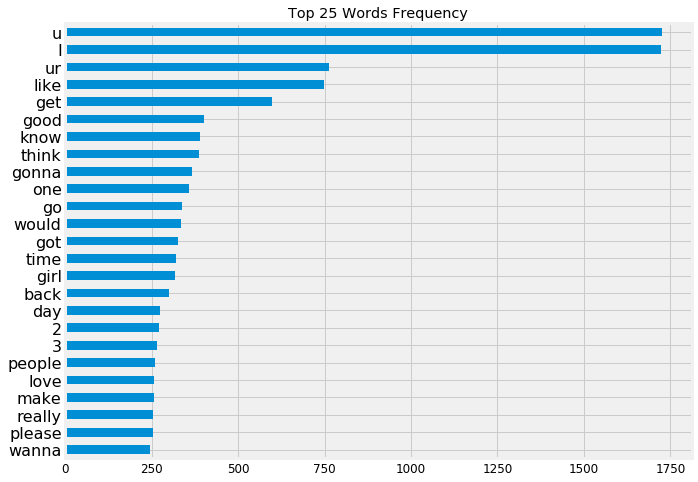

In [187]:
imp_word=word_freq.sort_values(ascending=False)[3:28].sort_values(ascending=True)

imp_word.plot(kind = "barh",figsize=(10,8))
plt.title("Top 25 Words Frequency");

In [108]:
mentions_freq=df['mentions'].apply(lambda x: pd.value_counts(x)).sum(axis = 0)

In [109]:
mentions_freq.sort_values(ascending=False)

[]                   15990.0
['michaelaokla']     1616.0 
['caucasianjame']    1394.0 
['pissboymcgee']     1376.0 
['captainkalvis']    1122.0 
                      ...   
['jvn']              7.0    
['tmz']              7.0    
['god']              7.0    
['fbi']              7.0    
['fcc']              7.0    
Length: 2129, dtype: float64

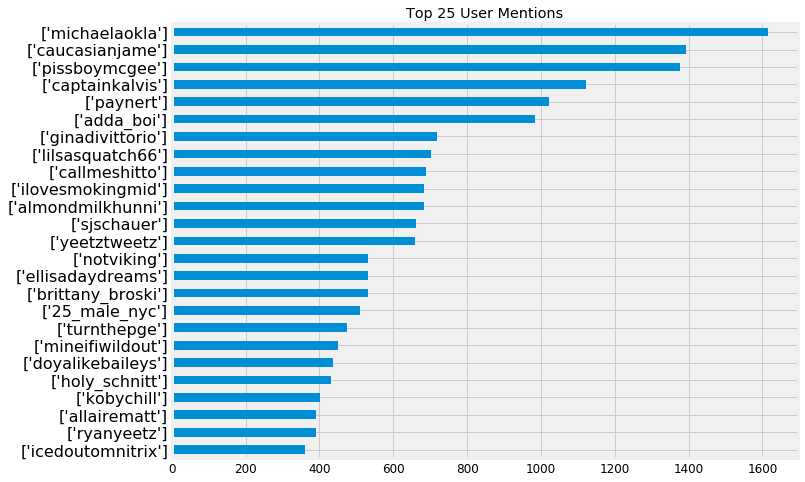

In [173]:
imp_mentions=mentions_freq.sort_values(ascending=False)[1:26].sort_values(ascending=True)

imp_mentions.plot(kind = "barh",figsize=(10,8))
plt.title("Top 25 User Mentions");

In [91]:
df.timezone.value_counts()

EDT    12994
Name: timezone, dtype: int64

In [92]:
df.retweet.value_counts()

False    12994
Name: retweet, dtype: int64

In [93]:
df['Datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df = df.set_index('Datetime')

In [95]:
df.sort_index(inplace=True)

In [99]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,sentiment,polarity,polarity_score,subjectivity_score,subjectivity,tweet_clean
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-03-27 12:04:44,52038352874127361,52038352874127361,1301241884000,2011-03-27,12:04:44,EDT,272985460,caucasianjames,James,NaN,Throwin up my first twitter bomb. To bad I don't have any followers. Help me out wheat thins.,[],[],[],10,17,256,[],[],https://twitter.com/CaucasianJames/status/52038352874127361,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '272985460', 'username': 'CaucasianJames'}]",NaN,NaN,NaN,NaN,"(-0.22499999999999992, 0.5)",negative,-0.225000,0.500000,neutral,"[Throwin, first, twitter, bomb, To, bad, I, followers, Help, wheat, thins]"
2011-03-27 23:29:38,52210714185699329,52210714185699329,1301282978000,2011-03-27,23:29:38,EDT,272985460,caucasianjames,James,NaN,Shout out to my only 2 followers. Me and Andrew are going to bed while you guys soak up the spring break life at Mary joes or cindys.,[],[],[],0,0,0,[],[],https://twitter.com/CaucasianJames/status/52210714185699329,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '272985460', 'username': 'CaucasianJames'}]",NaN,NaN,NaN,NaN,"(0.0, 1.0)",neutral,0.000000,1.000000,subjective,"[Shout, 2, followers, Me, Andrew, going, bed, guys, soak, spring, break, life, Mary, joes, cindys]"
2011-03-29 13:50:21,52789706978635776,52789706978635776,1301421021000,2011-03-29,13:50:21,EDT,272985460,caucasianjames,James,NaN,Chuckin down krispy creams in study hall,[],[],[],0,0,3,[],[],https://twitter.com/CaucasianJames/status/52789706978635776,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '272985460', 'username': 'CaucasianJames'}]",NaN,NaN,NaN,NaN,"(-0.15555555555555559, 0.2888888888888889)",negative,-0.155556,0.288889,objective,"[Chuckin, krispy, creams, study, hall]"
2011-03-29 22:31:45,52920919366176768,52920919366176768,1301452305000,2011-03-29,22:31:45,EDT,272985460,caucasianjames,James,NaN,Perfect twit pic for @KillaQwaybin http://yfrog.com/h8n2hnkj,[],['http://yfrog.com/h8n2hnkj'],[],0,1,1,[],[],https://twitter.com/CaucasianJames/status/52920919366176768,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '272985460', 'username': 'CaucasianJames'}]",NaN,NaN,NaN,NaN,"(1.0, 1.0)",positive,1.000000,1.000000,subjective,"[Perfect, twit, pic]"
2011-03-29 22:46:01,52924510390845440,52921200032231424,1301453161000,2011-03-29,22:46:01,EDT,272985460,caucasianjames,James,NaN,@samkrabbenhoft it was on my iPod cause I think I put it on fbook at one point. Pic will definitely get him followers,['samkrabbenhoft'],[],[],0,0,0,[],[],https://twitter.com/CaucasianJames/status/52924510390845440,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '272985460', 'username': 'CaucasianJames'}, {'user_id': '273707765', 'username': 'samkrabbenhoft'}]",NaN,NaN,NaN,NaN,"(0.0, 0.5)",neutral,0.000000,0.500000,neutral,"[iPod, cause, I, think, I, put, fbook, one, point, Pic, definitely, get, followers]"


In [112]:
hours_avg=df[['replies_count','retweets_count','likes_count','polarity_score','subjectivity_score']].groupby(df.index.hour).mean()
hours_avg

,replies_count,retweets_count,likes_count,polarity_score,subjectivity_score
Datetime,,,,,
0,12.044349,648.137339,5675.443491,0.100492,0.255648
1,6.934932,362.078767,2883.143836,0.089879,0.278338
2,1.716049,33.185185,433.555556,0.082899,0.267629
3,0.730769,18.307692,146.038462,0.073436,0.305080
4,0.375000,0.375000,6.500000,0.000000,0.000000
5,0.000000,0.250000,4.000000,0.045536,0.511786
6,0.000000,0.000000,1.000000,-0.183333,0.733333
8,0.450000,0.600000,21.300000,0.101815,0.182817
9,0.543478,2.847826,102.500000,0.101169,0.218659


In [113]:
hours_avg.reset_index(inplace=True)

In [114]:
hours_avg

,Datetime,replies_count,retweets_count,likes_count,polarity_score,subjectivity_score
0,0,12.044349,648.137339,5675.443491,0.100492,0.255648
1,1,6.934932,362.078767,2883.143836,0.089879,0.278338
2,2,1.716049,33.185185,433.555556,0.082899,0.267629
3,3,0.730769,18.307692,146.038462,0.073436,0.305080
4,4,0.375000,0.375000,6.500000,0.000000,0.000000
5,5,0.000000,0.250000,4.000000,0.045536,0.511786
6,6,0.000000,0.000000,1.000000,-0.183333,0.733333
7,8,0.450000,0.600000,21.300000,0.101815,0.182817
8,9,0.543478,2.847826,102.500000,0.101169,0.218659
9,10,3.548387,254.198925,2009.629032,0.138773,0.323359


In [115]:
hours_avg['Datetime'] = hours_avg['Datetime'] -1

In [116]:
hours_avg['Datetime'][0]=23

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
hours_avg = hours_avg.set_index('Datetime')
hours_avg.sort_index(inplace=True)
hours_avg

,replies_count,retweets_count,likes_count,polarity_score,subjectivity_score
Datetime,,,,,
0,6.934932,362.078767,2883.143836,0.089879,0.278338
1,1.716049,33.185185,433.555556,0.082899,0.267629
2,0.730769,18.307692,146.038462,0.073436,0.305080
3,0.375000,0.375000,6.500000,0.000000,0.000000
4,0.000000,0.250000,4.000000,0.045536,0.511786
5,0.000000,0.000000,1.000000,-0.183333,0.733333
7,0.450000,0.600000,21.300000,0.101815,0.182817
8,0.543478,2.847826,102.500000,0.101169,0.218659
9,3.548387,254.198925,2009.629032,0.138773,0.323359


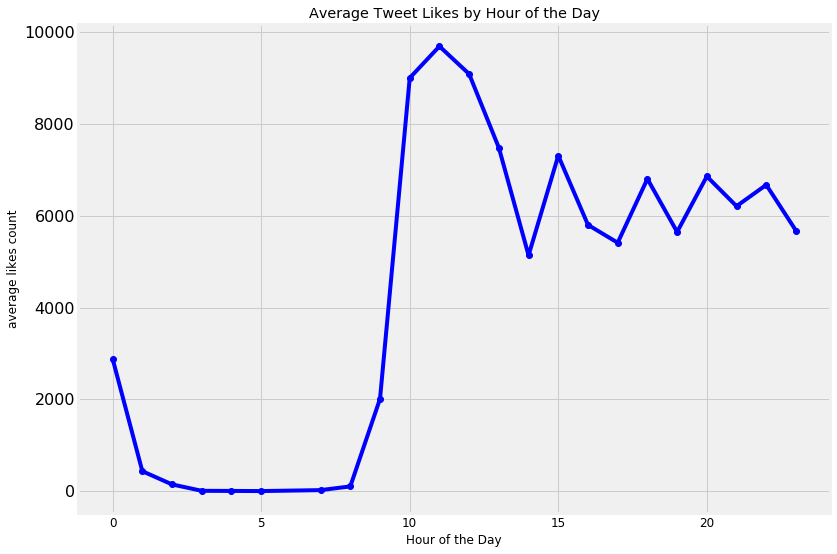

In [162]:
plt.figure(figsize=(12,9))
plt.plot(hours_avg['likes_count'],color='blue',marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('average likes count') 
plt.title('Average Tweet Likes by Hour of the Day');

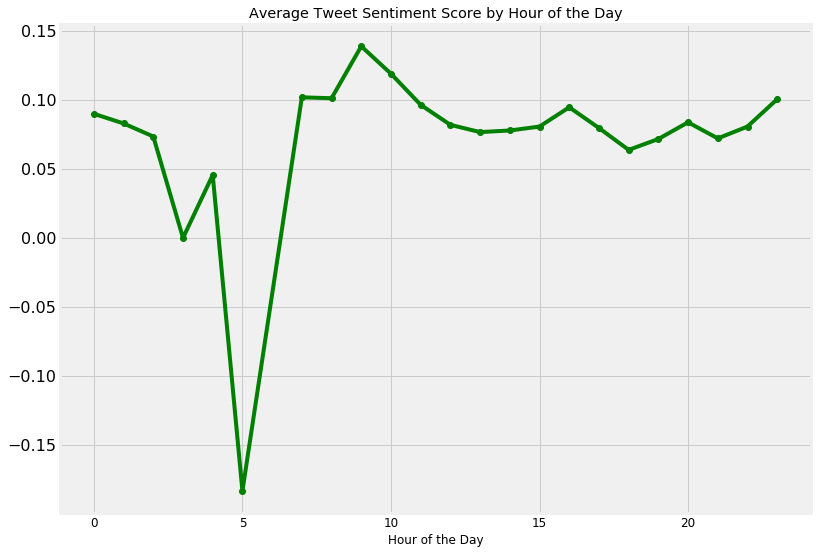

In [167]:
plt.figure(figsize=(12,9))
plt.plot(hours_avg['polarity_score'],color='green',marker='o')
plt.xlabel('Hour of the Day') 
plt.title('Average Tweet Sentiment Score by Hour of the Day');

In [125]:
months_count=df.resample('M').count()
months_count.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,sentiment,polarity,polarity_score,subjectivity_score,subjectivity,tweet_clean
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-03-31,9,9,9,9,9,9,9,9,9,0,9,9,9,9,9,9,9,9,9,9,9,0,9,0,0,0,0,0,0,9,0,0,0,0,9,9,9,9,9,9
2011-04-30,7,7,7,7,7,7,7,7,7,0,7,7,7,7,7,7,7,7,7,7,7,0,7,0,0,0,0,0,0,7,0,0,0,0,7,7,7,7,7,7
2011-05-31,26,26,26,26,26,26,26,26,26,0,26,26,26,26,26,26,26,26,26,26,26,0,26,0,0,0,0,0,0,26,0,0,0,0,26,26,26,26,26,26
2011-06-30,28,28,28,28,28,28,28,28,28,0,28,28,28,28,28,28,28,28,28,28,28,0,28,0,0,0,0,0,0,28,0,0,0,0,28,28,28,28,28,28
2011-07-31,22,22,22,22,22,22,22,22,22,0,22,22,22,22,22,22,22,22,22,22,22,0,22,0,0,0,0,0,0,22,0,0,0,0,22,22,22,22,22,22


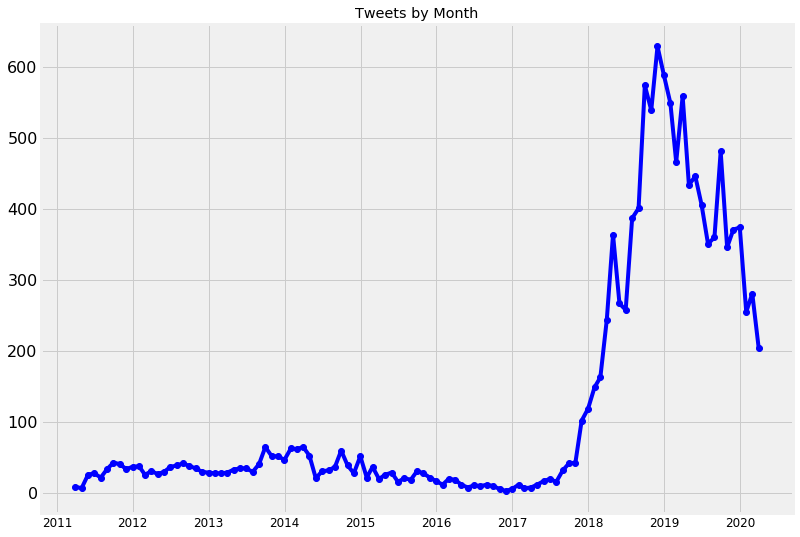

In [164]:
plt.figure(figsize=(12,9))
plt.plot(months_count['username'],color='blue',marker='o')
plt.title('Tweets by Month');

In [127]:
months_avg=df[['replies_count','retweets_count','likes_count','polarity_score','subjectivity_score']].resample('M').mean()
months_avg

,replies_count,retweets_count,likes_count,polarity_score,subjectivity_score
Datetime,,,,,
2011-03-31,1.111111,2.000000,28.888889,0.211684,0.541623
2011-04-30,0.000000,0.142857,0.000000,0.123160,0.408333
2011-05-31,0.000000,0.076923,0.038462,0.053972,0.290963
2011-06-30,0.214286,0.071429,0.035714,0.084413,0.318887
2011-07-31,0.409091,0.863636,4.954545,0.054951,0.360444
...,...,...,...,...,...
2019-11-30,49.814016,1614.237197,15570.574124,0.112929,0.323651
2019-12-31,38.286096,1905.454545,20424.441176,0.114232,0.312158
2020-01-31,33.882353,1436.827451,16405.180392,0.100173,0.280119


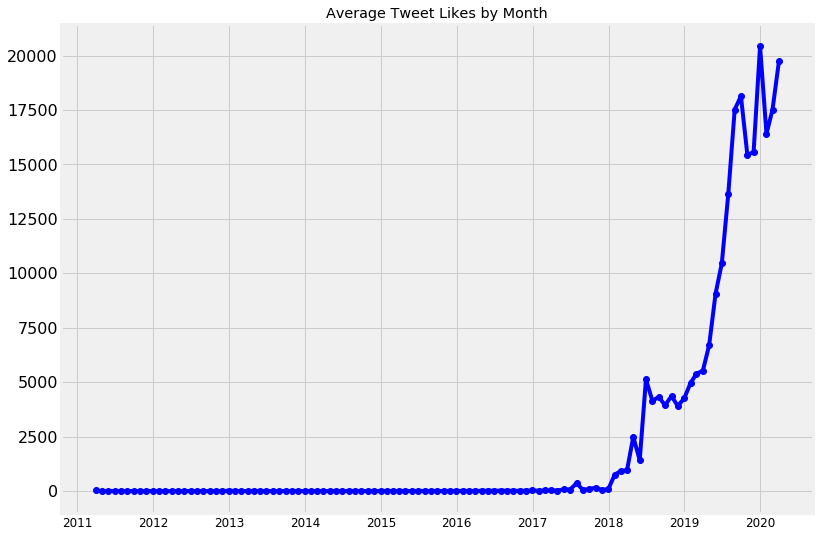

In [168]:
plt.figure(figsize=(12,9))
plt.plot(months_avg['likes_count'],color='blue',marker='o')
plt.title('Average Tweet Likes by Month');

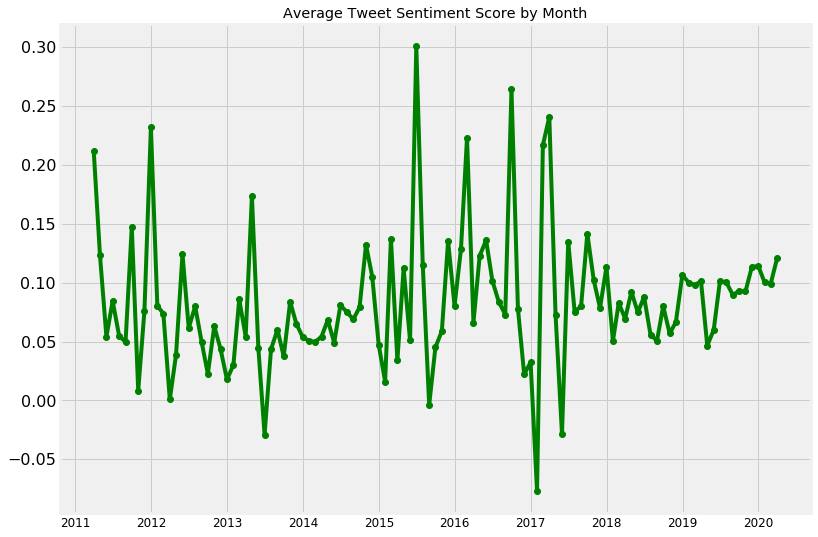

In [169]:
plt.figure(figsize=(12,9))
plt.plot(months_avg['polarity_score'],color='green',marker='o')
plt.title('Average Tweet Sentiment Score by Month');

In [137]:
week_df = df[['replies_count','retweets_count','likes_count','polarity_score','subjectivity_score']].groupby(df.index.weekday_name).mean()

In [149]:
week_df.at['Sunday', 'sort'] = 1
week_df.at['Monday', 'sort'] = 2
week_df.at['Tuesday', 'sort'] = 3
week_df.at['Wednesday', 'sort'] = 4
week_df.at['Thursday', 'sort'] = 5
week_df.at['Friday', 'sort'] = 6
week_df.at['Saturday', 'sort'] = 7

In [153]:
week_df=week_df.sort_values(by=['sort'])

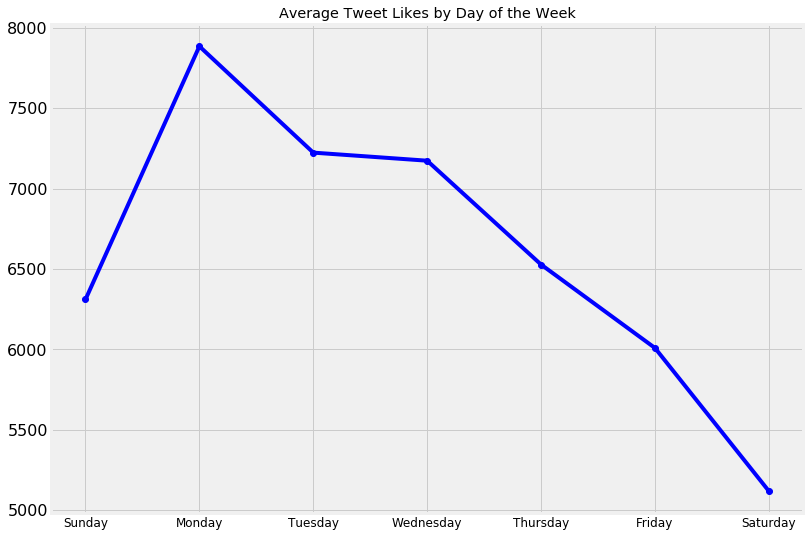

In [155]:
plt.figure(figsize=(12,9))
plt.plot(week_df['likes_count'],color='blue',marker='o')
plt.title('Average Tweet Likes by Day of the Week');

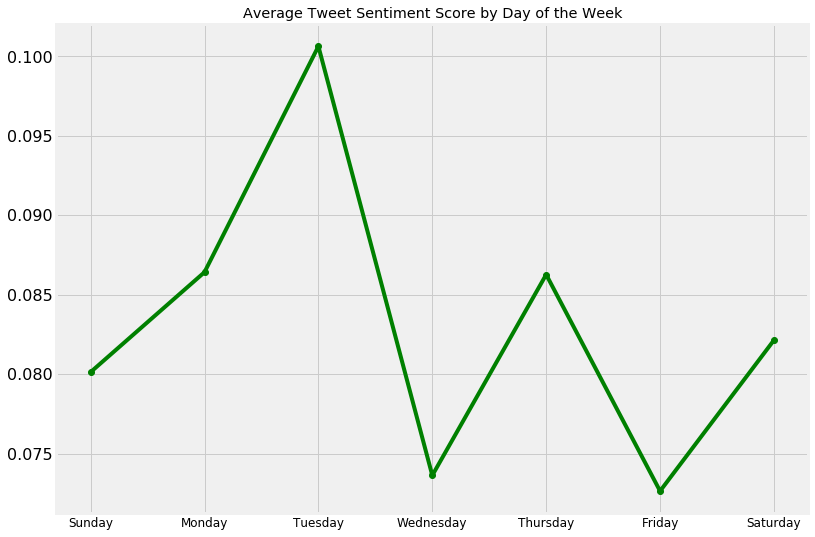

In [170]:
plt.figure(figsize=(12,9))
plt.plot(week_df['polarity_score'],color='green',marker='o')
plt.title('Average Tweet Sentiment Score by Day of the Week');